# Credit Card Fraud

**IMPORTS AND LIBRARIES**

In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
#from pandas_ml import ConfusionMatrix
#import pandas_ml as pdml
from sklearn.preprocessing import scale
import random

In [ ]:
# May have to do this...
!pip install imblearn
!pip install --upgrade sklearn

In [ ]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0  29986  1.175276  0.147916  0.504179  ... -0.016738  0.005179    1.29    0.0
1   3751  1.198446 -0.738668  0.464876  ... -0.025043  0.010697   85.32    0.0
2  23403  1.046403 -0.200965  0.791668  ...  0.057583  0.008750   57.16    0.0
3  14155  1.252259  0.423970  0.432953  ... -0.053318  0.024078    5.49    0.0
4  19914 -0.615461 -0.081930  1.991635  ...  0.041413  0.103229   10.00    0.0

[5 rows x 31 columns]

In [ ]:
df.fillna(df.mean())

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0      29986  1.175276  0.147916  0.504179  ... -0.016738  0.005179    1.29    0.0
1       3751  1.198446 -0.738668  0.464876  ... -0.025043  0.010697   85.32    0.0
2      23403  1.046403 -0.200965  0.791668  ...  0.057583  0.008750   57.16    0.0
3      14155  1.252259  0.423970  0.432953  ... -0.053318  0.024078    5.49    0.0
4      19914 -0.615461 -0.081930  1.991635  ...  0.041413  0.103229   10.00    0.0
...      ...       ...       ...       ...  ...       ...       ...     ...    ...
31775   4117  0.963254 -0.241329  0.525966  ... -0.074268  0.031356  147.69    0.0
31776  20259 -0.230903  0.188957  1.950648  ...  0.117670  0.129243   11.85    0.0
31777  34389  0.455735  0.142235  0.952939  ...  0.227254  0.176088    2.50    0.0
31778  34249  1.091599  0.314557 -0.228292  ...  0.065388 -0.003311    1.00    0.0
31779  10278  1.181330  0.355557  0.710944  ... -0.012341  0.009139    2.50    0.0

[31780 rows x 31 columns]

#Exploratory Data Anaysis


In [ ]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 102 fraud data points and 31677 nonfraudulent data points.


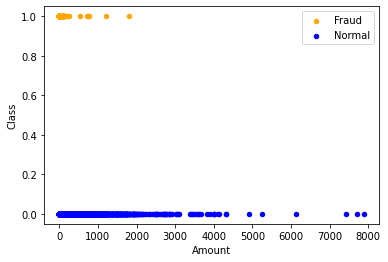

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [ ]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

In [ ]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

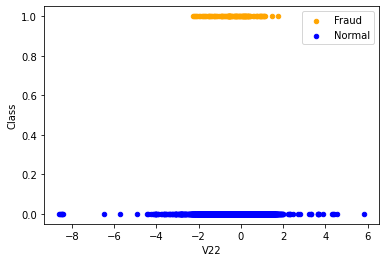

This feature may not be very important because of the similar distribution.


In [ ]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression (vanilla)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 171 0.0017154379382642978
Number of frauds on y_train: 321 0.0017339729046476956


In [ ]:
import sklearn
print(sklearn.__version__)

1.0.1


In [ ]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:

from sklearn.linear_model import LogisticRegression
#log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
#log_model.fit(X_train,y_train)
logistic = linear_model.LogisticRegression(C=1e5,solver='lbfgs')
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9965836554886272


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
Predicted      0    1  __all__
Actual                        
0          99486   43    99529
1             60   94      154
__all__    99546  137    99683


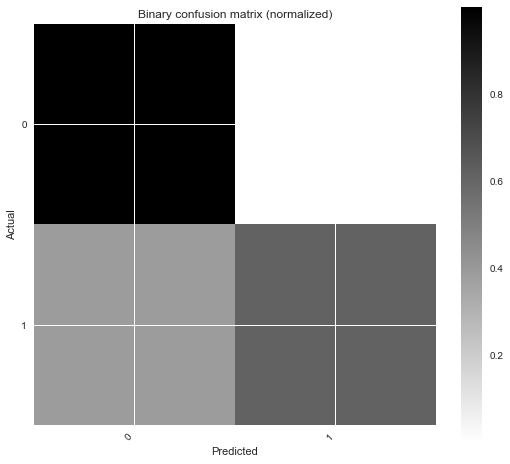

population: 99683
P: 154
N: 99529
PositiveTest: 137
NegativeTest: 99546
TP: 94
TN: 99486
FP: 43
FN: 60
TPR: 0.61038961039
TNR: 0.999567965116
PPV: 0.686131386861
NPV: 0.999397263577
FPR: 0.000432034884305
FDR: 0.313868613139
FNR: 0.38961038961
ACC: 0.998966724517
F1_score: 0.646048109966
MCC: 0.646640080385
informedness: 0.609957575505
markedness: 0.685528650438
prevalence: 0.00154489732452
LRP: 1412.82482634
LRN: 0.389778787644
DOR: 3624.68372093
FOR: 0.000602736423362


In [ ]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [ ]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

FNR is 0.38961038961038963


# Logistic Regression with SMOTE over-sampling

In [ ]:
!pip install scikit-learn==0.21.1
!pip install pandas==0.24.2
!pip install pandas_ml

     |████████████████████████████████| 6.7 MB 9.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.21.1 which is incompatible.


     |████████████████████████████████| 10.1 MB 8.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.24.2 which is incompatible.
plotnine 0.6.0 requires pandas>=0.25.0, but you have pandas 0.24.2 which is incompatible.
mizani 0.6.0 requires pandas>=0.25.0, but you have pandas 0.24.2 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.24.2 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.24.2 which is incompatible.


     |████████████████████████████████| 100 kB 5.2 MB/s 


#REPLACING NA VALUES WITH MEAN

In [ ]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.fillna(df.mean())

Time        V1        V2  ...       V28   Amount  Class
0       151925.0  0.040721  0.788778  ...  0.094827     6.68      0
1        31684.0  1.282019  0.344148  ...  0.014714     4.39      0
2       151151.0  1.876674 -0.432567  ... -0.010111    45.00      0
3       152724.0 -2.931913 -2.014283  ... -0.717748   167.40      0
4       132538.0  1.956849  0.404899  ... -0.030451    21.80      0
5        79600.0 -0.335284  0.892022  ... -0.014274    17.99      0
6        60261.0 -0.730985  1.029047  ...  0.166570     2.58      0
7       162307.0  0.007229  0.740990  ...  0.083222    11.99      0
8       164180.0 -3.167067 -1.545051  ... -0.248796   255.00      0
9        51095.0  1.272827 -0.592725  ...  0.045092    79.90      0
10      152252.0 -0.361900  0.703341  ...  0.242664    15.26      0
11      123219.0 -0.818186  1.014880  ...  0.156721   299.98      0
12         919.0  0.904289 -0.538055  ...  0.027252   158.00      0
13      127588.0 -0.918680 -0.506698  ...  0.001722   372.75      0
14       57716.0  1.275901  0.323440  ...  0.022731     9.99      0
15       69910.0 -0.500822  0.288860  ... -0.031938    50.00      0
16      153115.0  0.169623  0.807511  ...  0.300228    47.70      0
17       52075.0 -1.563504  1.465419  ...  0.003284    20.23      0
18      124176.0  1.247584 -2.061275  ... -0.017973   504.74      0
19      159145.0  2.130826 -0.328414  ... -0.090096    13.67      0
20      145702.0 -0.856520  0.882900  ... -0.287404     2.69      0
21       57521.0  1.340729 -0.864977  ...  0.018764    15.17      0
22      105403.0  0.558435  1.002371  ...  0.196518    69.42      0
23      129689.0 -0.810159 -5.041792  ...  0.175114  1406.18      0
24      106010.0  2.000924 -0.111623  ... -0.032487     2.12      0
25      130465.0 -1.284614  0.712750  ...  0.129456   150.00      0
26       55403.0  1.152138  0.017441  ...  0.039935     9.99      0
27      138904.0  1.960061  0.150643  ... -0.069288    34.19      0
28       63026.0  1.152811  0.107367  ...  0.032264    57.00      0
29      147640.0 -9.755201 -7.910502  ... -0.773435   300.39      0
...          ...       ...       ...  ...       ...      ...    ...
284777  151690.0 -0.978083  0.998583  ...  0.020716    33.12      0
284778   25605.0 -0.402577  1.106930  ...  0.098207     0.89      0
284779   50822.0  1.121948 -0.781718  ...  0.009532     1.00      0
284780  157647.0 -1.271999  0.170024  ...  0.418322     1.18      0
284781  140334.0 -0.564328  0.124015  ...  0.019887    29.90      0
284782  167840.0  2.009343 -0.071528  ... -0.077859    50.00      0
284783  141541.0 -1.474172  0.345041  ... -0.111183     2.00      0
284784   79216.0  1.264031 -0.626752  ...  0.007792    10.00      0
284785  161871.0 -0.096530  0.540541  ...  0.170098     5.78      0
284786   67616.0 -0.856003 -0.380800  ...  0.111244     1.50      0
284787   83904.0 -1.158593 -0.161714  ... -0.133858    33.30      0
284788   97158.0 -0.499717  0.909767  ...  0.086423    24.50      0
284789  127026.0 -0.925617 -2.092631  ... -0.387908   158.00      0
284790  122010.0  1.817046 -1.363244  ... -0.035780   161.80      0
284791  136145.0  1.545173 -1.774679  ... -0.011633   208.00      0
284792  124697.0 -0.476377 -0.287286  ... -0.070860    90.00      0
284793  151486.0 -0.495855  1.217750  ...  0.102919     4.49      0
284794  134743.0  1.822136 -1.496731  ... -0.004977   214.59      0
284795   86721.0 -1.154405  1.682535  ...  0.040472    22.98      0
284796  150930.0  2.013473 -0.989916  ... -0.037419    71.02      0
284797  166553.0  0.042185  0.941438  ...  0.098853     1.78      0
284798   84975.0  1.461203 -0.907657  ...  0.022320    10.00      0
284799   22314.0  1.284475 -0.528597  ...  0.024173    11.85      0
284800   32448.0  1.303730 -0.469373  ...  0.010791     4.19      0
284801   68425.0  1.150440  0.459117  ... -0.008396    84.87      0
284802   65595.0 -0.814315  2.799552  ...  0.130870     0.99      0
284803  163745.0 -0.015333  0.103066  ...  0.048096     1.00      0


In [ ]:
pip install -U imbalanced-learn

  Using cached scikit_learn-1.0.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2
    Uninstalling scikit-learn-0.22.2:
      Successfully uninstalled scikit-learn-0.22.2


In [ ]:
pip install scikit-learn==1.0.1

     |████████████████████████████████| 23.2 MB 2.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [ ]:
pip install yellowbrick==0.9.1 scikit-learn==0.22.2

     |████████████████████████████████| 282 kB 7.5 MB/s 
     |████████████████████████████████| 7.1 MB 41.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 1.3.post1
    Uninstalling yellowbrick-1.3.post1:
      Successfully uninstalled yellowbrick-1.3.post1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2 which is incompatible.


In [ ]:
!pip install imbalanced-learn

**MODEL FITTING**

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X, y)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9800367163909594


Confusion matrix:
Predicted      0    1  __all__
Actual                        
0          99486   43    99529
1             60   94      154
__all__    99546  137    99683


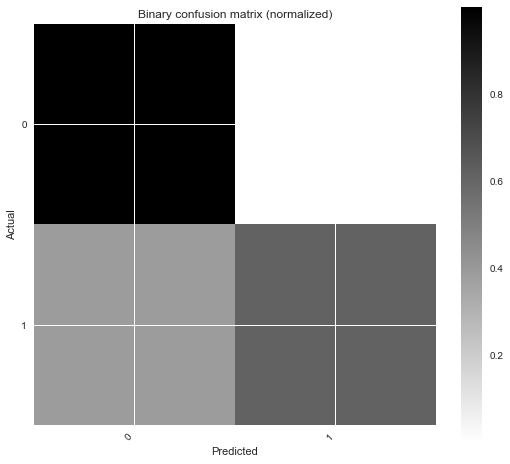

population: 99683
P: 154
N: 99529
PositiveTest: 137
NegativeTest: 99546
TP: 94
TN: 99486
FP: 43
FN: 60
TPR: 0.61038961039
TNR: 0.999567965116
PPV: 0.686131386861
NPV: 0.999397263577
FPR: 0.000432034884305
FDR: 0.313868613139
FNR: 0.38961038961
ACC: 0.998966724517
F1_score: 0.646048109966
MCC: 0.646640080385
informedness: 0.609957575505
markedness: 0.685528650438
prevalence: 0.00154489732452
LRP: 1412.82482634
LRN: 0.389778787644
DOR: 3624.68372093
FOR: 0.000602736423362


In [ ]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [ ]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.12987012987012986


In [ ]:
y_pred = logistic.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
    # classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")



Confusion Matrix :- 
 [[2765   19]
 [   0    7]]
Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2784
         1.0       0.27      1.00      0.42         7

    accuracy                           0.99      2791
   macro avg       0.63      1.00      0.71      2791
weighted avg       1.00      0.99      1.00      2791



# Logistic Regression with balanced class weights

In [ ]:
best_c, best_fnr = 1, 1
for _ in range(20):
    c = random.uniform(1, 10000)
    logistic = linear_model.LogisticRegression(C=c, class_weight="balanced")
    logistic.fit(X_train, y_train)
    #print("Score: ", logistic.score(X_test, y_test))
    y_predicted2 = np.array(logistic.predict(X_test))
    y_right2 = np.array(y_test)
    confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
    #print("Confusion matrix:\n%s" % confusion_matrix2)
    #confusion_matrix2.plot(normalized=True)
    #plt.show()
    #confusion_matrix2.print_stats()
    fnr = confusion_matrix2.stats()['FNR']
    if fnr < best_fnr:
        best_fnr = fnr
        best_c = c
print("Best C is {0} with best FNR of {1}.".format(best_c, best_fnr))

Best C is 5315.534060359721 with best FNR of 0.09740259740259741.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(f"Confusion Matrix :- \n {confusion_matrix(y_right2, y_predicted2)}")
    # classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_right2, y_predicted2)}")


Confusion Matrix :- 
 [[695   0]
 [  1   0]]
Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       695
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       696
   macro avg       0.50      0.50      0.50       696
weighted avg       1.00      1.00      1.00       696



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
